In [1]:
import pandas as pd
df = pd.read_csv('problem3.csv')
df.head()

,userid,group,Q1-1,Q1-2,Q1-3,Q1-4,Q2-1,Q2-2,Q2-3,Q2-4,...,Q3-3,Q3-4,Q4-1,Q4-2,Q4-3,Q4-4,Q5-1,Q5-2,Q5-3,Q5-4
0,0,A,5,2,1,2,4,5,3,3,...,1,1,5,2,5,3,3,4,3,4
1,1,A,2,2,3,3,4,3,1,4,...,2,3,4,3,5,3,1,2,1,1
2,2,A,1,3,4,4,2,1,4,4,...,4,2,1,3,4,1,3,3,2,5
3,3,A,3,3,4,2,2,4,4,3,...,2,3,3,4,2,4,1,1,3,2
4,4,A,3,1,2,3,4,3,4,1,...,5,1,3,2,3,1,3,2,5,4


1. 역문항을 변환한 후 각 그룹(A~D)의 영역 (Q1~Q5) 별 응답의 평균, 표준편차, 왜도, 첨도를 구하라. (각 통계량 별로 4*5 데이터프레임 생성)

In [2]:
for num in range(1,6):
    df[f'Q{num}-3'] = 6 - df[f'Q{num}-3']

In [8]:

for num in range(1,6):
    col_lst = ['group']
    for col in range(1,5):
        col_lst.append(f'Q{num}-{col}')
        
    target = df[col_lst]
    
    targetdf = target.set_index('group').unstack().to_frame().reset_index()[['group',0]].rename(columns={0:f'Q{num}'})
    
    display(targetdf.groupby('group').agg(['mean','std','skew',pd.DataFrame.kurt]))

Q1                              
        mean       std      skew      kurt
group                                     
A      3.016  1.263860 -0.077803 -1.087887
B      3.042  1.242489 -0.126751 -1.022905
C      3.030  1.243642 -0.050626 -1.033246
D      2.991  1.264325 -0.069421 -1.081406

Q2                              
        mean       std      skew      kurt
group                                     
A      3.058  1.236999 -0.129390 -0.997133
B      3.048  1.266215 -0.111043 -1.060834
C      3.063  1.256427 -0.122030 -1.046603
D      3.091  1.249913 -0.166334 -1.018150

Q3                              
        mean       std      skew      kurt
group                                     
A      2.992  1.268679 -0.061600 -1.098330
B      3.050  1.238965 -0.117158 -1.035672
C      3.023  1.248210 -0.102330 -0.988577
D      3.034  1.255556 -0.128043 -1.043094

Q4                              
        mean       std      skew      kurt
group                                     
A      3.043  1.255678 -0.090314 -1.028166
B      3.041  1.240507 -0.071541 -1.014676
C      3.014  1.283531 -0.074531 -1.100094
D      3.080  1.268546 -0.144620 -1.006126

Q5                              
        mean       std      skew      kurt
group                                     
A      3.088  1.256119 -0.102638 -1.053632
B      2.983  1.272136 -0.055805 -1.080934
C      2.987  1.260325 -0.068696 -1.071557
D      2.989  1.250777 -0.065315 -1.055332

2. 그룹 별로 Q1-1 문항의 차이가 존재하는지 anova분석을 시행하라.

In [13]:
import scipy.stats as stats
a = df[df.group == 'A']['Q1-1']
b = df[df.group == 'B']['Q1-1']
c = df[df.group == 'C']['Q1-1']
d = df[df.group == 'D']['Q1-1']

print('a : ',stats.shapiro(a))
print('b : ',stats.shapiro(b))
print('c : ',stats.shapiro(c))
print('d : ',stats.shapiro(d))

a :  ShapiroResult(statistic=0.8959194421768188, pvalue=4.089666539447423e-12)
b :  ShapiroResult(statistic=0.9031107425689697, pvalue=1.2895768654319628e-11)
c :  ShapiroResult(statistic=0.9036667346954346, pvalue=1.4126045819184974e-11)
d :  ShapiroResult(statistic=0.8961024284362793, pvalue=4.2081052184506085e-12)


4 집단 모두 p-value값이 0.05보다 작아 정규성을 만족하지 않는다.

In [14]:
stats.kruskal(a,b,c,d)

KruskalResult(statistic=4.567127187870985, pvalue=0.20638028098088249)

유의수준이 0.05보다 크기 때문에 귀무가설을 채택한다. 즉, 4 그룹의 Q1-1의 평균은 차이가 없다고 할 수 있다.

3. 탐색적 요인분석을 수행하고 결과를 시각화하라.

In [15]:
ana = df.drop(columns=['userid','group'])


In [16]:
!pip install factor-analyzer

     -------------------------------------- 41.7/41.7 kB 251.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=a9d24b493d64c612307e740a5c4ad75b228260828afc6ee83ca68079bccf7228
  Stored in directory: c:\users\suhye\appdata\local\pip\cache\wheels\7d\91\33\1f0cc7cbae768cad407d8dda04f75b484ab7197f91ce8eaaa5
Successfully built factor-analyzer


In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(ana)
chi_square_value, p_value

(232.67704188784805, 0.018873676984099152)

In [18]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer import calculate_kmo

kmo_all, kmo_model=  calculate_kmo(ana)
kmo_model

0.4901789141416506

kmo 결과 0.6 이하는 부적합하다고 판단

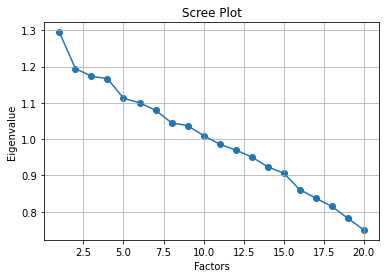

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(ana)

ev, v = fa.get_eigenvalues()
plt.scatter(range(1,ana.shape[1]+1),ev)
plt.plot(range(1,ana.shape[1] + 1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<AxesSubplot:>

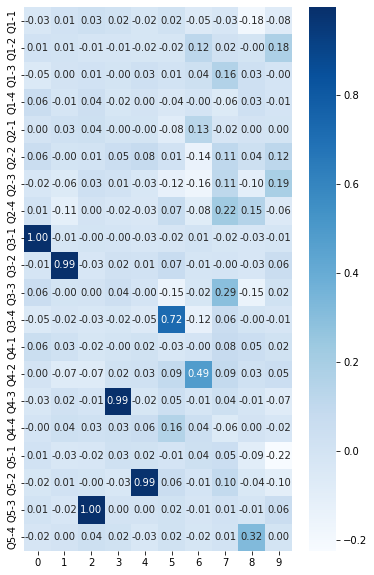

In [23]:
fa = FactorAnalyzer(n_factors=10, rotation='varimax')
fa.fit(ana)
efa_result = pd.DataFrame(fa.loadings_, index = ana.columns)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap = "Blues", annot=True, fmt = '.2f')